In [1]:
import os
#os.environ[] 環境変数の取得
os.environ['KERAS_BACKEND'] = "tensorflow"
kerasBKED= os.environ["KERAS_BACKEND"]
print(kerasBKED)

tensorflow


In [2]:
os.chdir("C:\\Users\\tomohiko\\Autoencoder")

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import pickle
import numpy as np

In [3]:
#Cifar10を読み込む
batch_size = 32
num_clases=10
epochs = 5
saveDir = "C:\\Users\\tomohiko\\Autoencoder\\TESTTESTimages4"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)
    print("Dirをつくりました")

Dirをつくりました


In [4]:
#画像の水増しを使っての実験
#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import  ImageDataGenerator
%matplotlib inline

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\zundamon\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []

datagen = image.ImageDataGenerator(rotation_range=90)

#画像読み取り用
imgs = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    imgs.append(tempimagearray)
    
    #水増し用の部分
    x = tempimagearray[np.newaxis]
    gen = datagen.flow(x,batch_size=1)
    
    for i in range(2):
        imgs.append(next(gen)[0])
    #上下反転したものを加える
    flippedud_img = np.flipud(tempimagearray)
    imgs.append(flippedud_img)
    #左右反転したものを加える
    flippedlr_img = np.fliplr(tempimagearray)
    imgs.append(flippedlr_img)
    
    
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

imgs = np.array(imgs)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()

410
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_110.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_111.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_112.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_113.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_115.jpg

C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_23.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_230.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_233.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_234.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_236.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_237.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_238.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_241.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_243.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_245.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_246.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_249.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_251.jpg
(

C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_360.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_364.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_365.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_366.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_367.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_368.jpg
画像の形がいびつです C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_368.jpg
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_37.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_371.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_372.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_374.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_375.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_376.jpg
(128, 128, 3)
C:\U

C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_524.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_525.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_528.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_529.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_53.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_530.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_531.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_533.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_534.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_535.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_536.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_537.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_538.jpg
(

<Figure size 100x41000 with 0 Axes>

In [5]:
print(len(imgs))
print(type(imgs[0]))
print(imgs[0].shape)

1945
<class 'numpy.ndarray'>
(128, 128, 3)


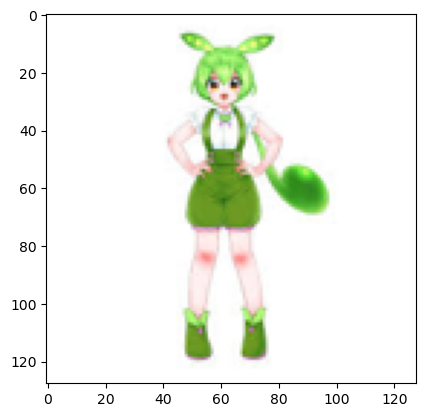

In [6]:
plt.imshow(imgs[0].astype('uint8'))
plt.show()

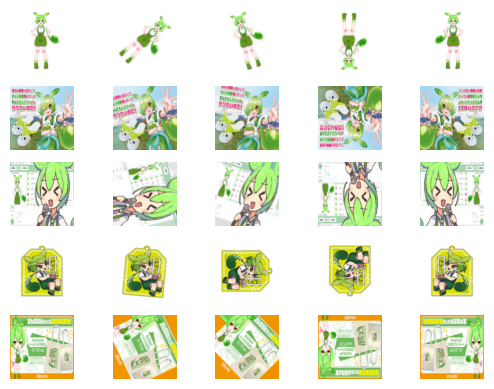

In [7]:
#画像を確認する
for j in range(25):
    plt.subplot(5,5,j+1)
    plt.imshow(imgs[j].astype('uint8'))
    #cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)
    #plt.imshow(imgs[j])
    plt.axis('off')
plt.show()

In [8]:
#ここからオートエンコーダーを用いる
input_img = Input(shape=(128, 128, 3))
x = Conv2D(256, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)#BatchNormalization()勾配消失、爆発を防ぐ
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

In [9]:
model=Model(input_img,decoded)
model.compile(optimizer="adam",loss='mse')

In [10]:
#なんかセーブする所(一旦虫)
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = saveDir + 'AutoEncoder_Cifar10_Deep_weights.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [11]:
#モデルをつくる(エポッチ数を5とする)
history = model.fit(imgs[:1361], imgs[:1361],
                    batch_size=20,
                    epochs=25,
                    verbose=1,
                    validation_data=(imgs[1361:1754], imgs[1361:1754]),
                    #callbacks=[es_cb, cp_cb],
                    shuffle=True)

Epoch 1/25
69/69 [==============================] - 386s 6s/step - loss: 35754.8398 - val_loss: 32150.9746
Epoch 2/25
69/69 [==============================] - 369s 5s/step - loss: 35745.5234 - val_loss: 32171.4785
Epoch 3/25
69/69 [==============================] - 359s 5s/step - loss: 35738.3555 - val_loss: 32167.5156
Epoch 4/25
69/69 [==============================] - 362s 5s/step - loss: 35731.7227 - val_loss: 32168.4102
Epoch 5/25
69/69 [==============================] - 366s 5s/step - loss: 35725.5742 - val_loss: 32162.4785
Epoch 6/25
69/69 [==============================] - 362s 5s/step - loss: 35719.4258 - val_loss: 32164.4199
Epoch 7/25
69/69 [==============================] - 361s 5s/step - loss: 35713.9375 - val_loss: 32155.0938
Epoch 8/25
69/69 [==============================] - 359s 5s/step - loss: 35708.6641 - val_loss: 32156.6777
Epoch 9/25
69/69 [==============================] - 360s 5s/step - loss: 35703.8516 - val_loss: 32146.6191
Epoch 10/25
69/69 [==================

In [12]:
score2 = model.evaluate(imgs[1754:1945],imgs[1754:1945],verbose=1)
print(score2)

6/6 [==============================] - 10s 2s/step - loss: 40137.1094
40137.109375


In [13]:
model.save("zuntamonmizumashi25epoch")

INFO:tensorflow:Assets written to: zuntamonmizumashi25epoch\assets


INFO:tensorflow:Assets written to: zuntamonmizumashi25epoch\assets


In [14]:
loadmodel = load_model("zuntamonmizumashi25epoch")

1/1 [==============================] - 0s 291ms/step


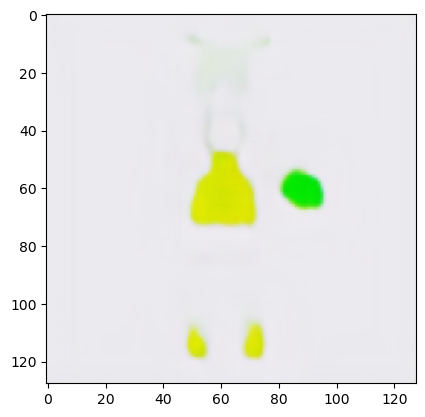

In [15]:
ttt =  loadmodel.predict(imgs[0:1])
plt.imshow(ttt[0])

In [16]:
#背景の読み取り
#その他の画像でもやってみる

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\background\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
otherimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    otherimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

otherimg = np.array(otherimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()
    

460
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_0.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_285.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_286.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_289.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_29.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_290.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_292.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_293.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_295.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_296.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_297.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_298.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_3.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_517.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_519.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_521.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_523.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_524.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_527.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_528.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_529.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_53.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_531.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_533.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_535.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencod

<Figure size 100x46000 with 0 Axes>

In [17]:
#人物の画像で実験を行う

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\human\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
humanrimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    humanrimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

humanrimg = np.array(humanrimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()

437
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoenc

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_31.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_310.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_311.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_312.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_314.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_315.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_316.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_317.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_318.jpg
画像の形がいびつです C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_318.jpg
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_319.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_32.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_320.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_46.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_461.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_465.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_467.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_468.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_47.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_470.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_472.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_473.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_474.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_475.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_477.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_48.jpg
(128, 128, 3)
C:\Users\tomoh

<Figure size 100x43700 with 0 Axes>

In [18]:
#アニメの絵で実験を行う
#人物の画像で実験を行う

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\anime\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
animeimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    animeimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

animeimg = np.array(animeimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()

676
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_242.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_243.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_244.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_245.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_246.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_247.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_248.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_249.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_25.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_250.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_251.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_252.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_253.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZun

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_404.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_405.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_406.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_407.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_408.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_409.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_41.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_410.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_411.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_412.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_413.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_414.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_415.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZun

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_572.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_573.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_574.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_575.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_576.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_577.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_578.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_579.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_58.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_580.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_581.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_582.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_583.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZun

<Figure size 100x67600 with 0 Axes>

1/1 [==============================] - 0s 271ms/step


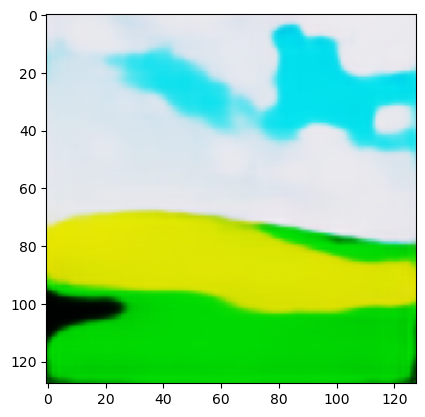

In [19]:
#背景の画像を作ってみる
ttt =  loadmodel.predict(otherimg[0:1])
plt.imshow(ttt[0])

In [20]:
#各スコアを確認し始める
#ずんだもん
#複数の画像を入れて、配列をcsvに保存する
zunscores = []
for i in range(1754,1945,1):
    sco = model.evaluate(imgs[i:i+1],imgs[i:i+1],verbose=1)
    zunscores.append(sco)

score3 = model.evaluate(imgs[1754:1945],imgs[1754:1945],verbose=1)
print(score3)

1/1 [==============================] - 0s 76ms/step - loss: 49437.6133


6/6 [==============================] - 11s 2s/step - loss: 40137.1094
40137.109375


In [21]:
#配列を保存する
zunscore2 = np.array(zunscores)
np.save("zunscores25epoch.npy",zunscore2)

In [22]:
#配列を読み込む
loadzun = np.load("zunscores25epoch.npy")
print(len(loadzun))
print(loadzun[0])

191
37087.609375


In [23]:
#平均　分散を求める
import statistics
import math
zundaave = statistics.mean(zunscore2)
zundastatistics = statistics.pvariance(zunscore2)#母数は190
print(zundaave)
print(zundastatistics)

40137.112412058246
126395116.39703928


In [24]:
#背景
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
haikeiscores = []
for i in range(0,201,1):
    sco = model.evaluate(otherimg[i:i+1],otherimg[i:i+1],verbose=1)
    haikeiscores.append(sco)

score3 = model.evaluate(otherimg[0:1],otherimg[0:1],verbose=1)
print(score3)

#配列を保存する
haikeiscores = np.array(haikeiscores)
np.save("haikeiscore25epoch.npy",haikeiscores)


#平均　分散を求める
import statistics
import math
haikeiave = statistics.mean(haikeiscores)
haikeistatistics = statistics.pvariance(haikeiscores)#母数は190
print(haikeiave)
print(haikeistatistics)

1/1 [==============================] - 0s 109ms/step - loss: 18528.0508


1/1 [==============================] - 0s 84ms/step - loss: 25174.5684
25174.568359375
18896.40030074238
79778356.35346906


In [26]:
#結果をCCSVに保存する
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
humanscores = []
for i in range(0,201,1):
    sco = model.evaluate(humanrimg[i:i+1],humanrimg[i:i+1],verbose=1)
    humanscores.append(sco)

score3 = model.evaluate(humanrimg[0:1],humanrimg[0:1],verbose=1)
print(score3)

#配列を保存する
humanscores = np.array(humanscores)
np.save("humanscores25epoch.npy",humanscores)


#平均　分散を求める
import statistics
import math
humanave = statistics.mean(humanscores)
humanstatistics = statistics.pvariance(humanscores)#母数は190
print(humanave)
print(humanstatistics)

1/1 [==============================] - 0s 68ms/step - loss: 32323.1523


1/1 [==============================] - 0s 75ms/step - loss: 20052.2656
20052.265625
27708.346439190766
157706085.53141856


In [27]:
#結果をCCSVに保存するアニメ絵
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
animescores = []
for i in range(0,201,1):
    sco = model.evaluate(animeimg[i:i+1],animeimg[i:i+1],verbose=1)
    animescores.append(sco)

score3 = model.evaluate(animeimg[0:1],animeimg[0:1],verbose=1)
print(score3)

#配列を保存する
animescores = np.array(animescores)
np.save("animescores25epoch.npy",animescores)


#平均　分散を求める
import statistics
import math
animeave = statistics.mean(animescores)
animestatistics = statistics.pvariance(animescores)#母数は190
print(animeave)
print(animestatistics)

1/1 [==============================] - 0s 93ms/step - loss: 28969.7344


1/1 [==============================] - 0s 89ms/step - loss: 21148.9883
21148.98828125
24283.60363587337
111968666.839251


In [28]:
#各平均、分散を並べて表示させる
print("ずんだもん")
print(zundaave)
print(zundastatistics)
print("背景")
print(haikeiave)
print(haikeistatistics)
print("人物")
print(humanave)
print(humanstatistics)
print("アニメ絵")
print(animeave)
print(animestatistics)

ずんだもん
40137.112412058246
126395116.39703928
背景
18896.40030074238
79778356.35346906
人物
27708.346439190766
157706085.53141856
アニメ絵
24283.60363587337
111968666.839251
